In [14]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [23]:
mot_a=pd.read_csv('Mot_A_rel_2.csv')
mot_b=pd.read_csv('Mot_B_rel_1.csv')
mot_a= mot_a[(mot_a['Temp']<180) &(mot_a['VM']<455)]
mot_b=mot_b[(mot_b['Temp']<180) &(mot_b['VM']<455)]

In [24]:

comb_mot = pd.concat([mot_a, mot_b], ignore_index=True)

comb_mot = comb_mot.sample(frac=1, random_state=42).reset_index(drop=True)
comb_mot.head()

,d_alpha,h_c,r,w_t,l_t,w_o,dxIB,gamma,d_alpha_deg,hc_mm,w_o_mm,T,TR,m_Cu,m_mag,cos_phi,VM,Temp
0,0.422164,0.638280,76.045093,5.327578,23.636839,0.144537,0.244691,37.229907,9.498600,13.882784,1.452603,60.020045,14.385517,5.569144,0.000000,0.151436,78.219549,172.918088
1,0.667059,0.636256,76.018214,5.915151,16.677451,0.140389,-1.729169,54.717578,20.011800,13.543588,1.253201,335.899729,51.621081,2.915101,1.684764,0.639085,340.409190,167.122181
2,0.607082,0.454486,84.147356,8.017264,23.156216,0.357197,2.349520,69.565585,13.659300,9.478502,3.968644,141.598507,56.306420,4.184845,0.477693,0.450178,342.867654,167.361356
3,0.426346,0.692807,80.626074,8.670507,29.296312,0.289766,6.444407,41.209868,9.592875,15.668777,3.085902,87.054127,18.154342,4.834131,0.000000,0.199719,92.282546,155.281493
4,0.420930,0.463068,78.234973,5.368981,20.316259,0.224711,5.857267,60.236387,9.470925,11.928965,2.322714,50.298811,22.551241,4.609054,0.000000,0.139371,81.246060,179.955138


In [25]:
comb_mot=comb_mot.iloc[:,:8]


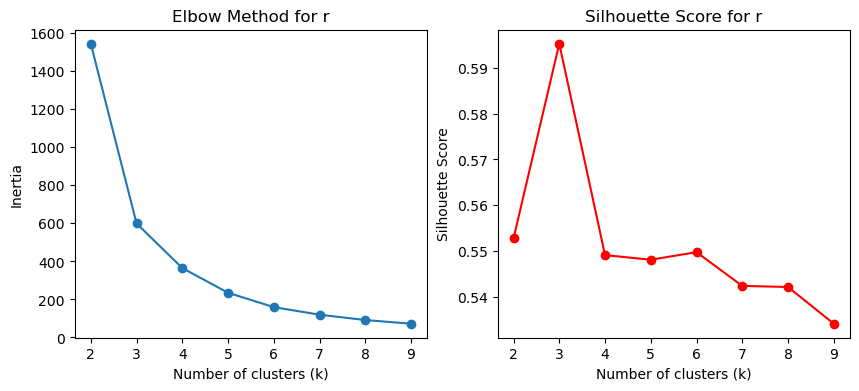

Optimal K from K-Means for r: 3
Number of Clusters from DBSCAN for r: 1


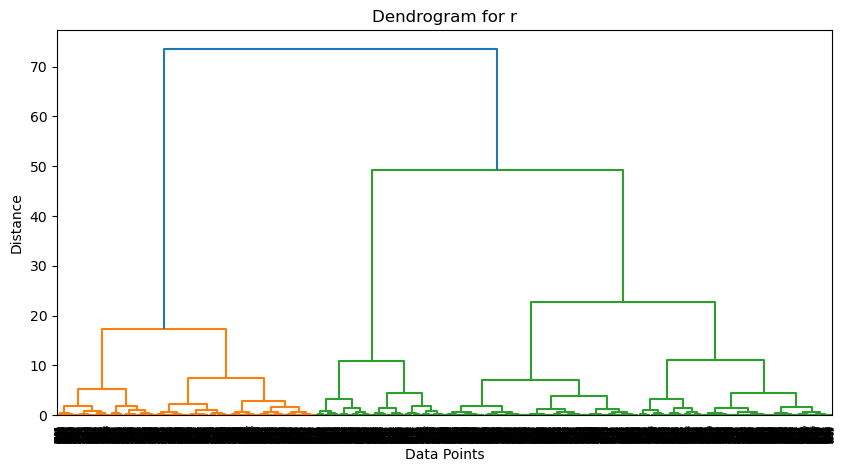

Number of Clusters from Hierarchical Clustering for r: 3


In [26]:

# Extract only 'r' column
r_values = comb_mot[['r']].values  # Ensure it's a 2D array

# Normalize 'r' values
scaler = StandardScaler()
r_scaled = scaler.fit_transform(r_values)

### K-MEANS CLUSTERING ###
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Testing k from 2 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(r_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(r_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for r')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for r')

plt.show()

# Optimal K (choose best silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal K from K-Means for r: {optimal_k}")

### DBSCAN CLUSTERING ###
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps based on scale
dbscan_labels = dbscan.fit_predict(r_scaled)
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of Clusters from DBSCAN for r: {num_clusters_dbscan}")

### HIERARCHICAL CLUSTERING ###
# Plot dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(r_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for r")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering using optimal K from K-Means
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(r_scaled)
print(f"Number of Clusters from Hierarchical Clustering for r: {optimal_k}")


Silhouette Score for K-Means (k=3): 0.595


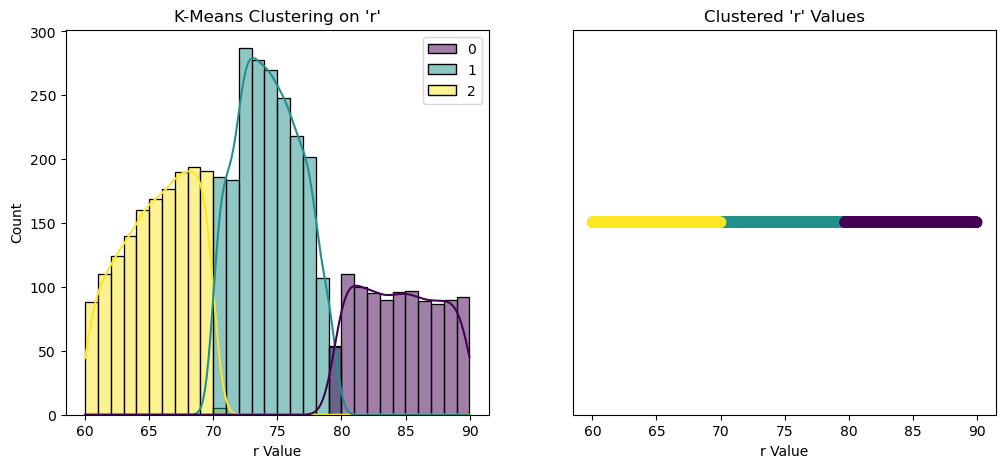

In [30]:


# Normalize the data (since it's only one feature, StandardScaler isn't critical, but keeping it for consistency)
scaler = StandardScaler()
comb_mot_scaled = scaler.fit_transform(comb_mot[['r']])  # Ensure it's a 2D array

### 1. Verify Silhouette Score ###
optimal_k = 3  # Based on previous results
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(comb_mot_scaled)
silhouette_avg = silhouette_score(comb_mot_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means (k={optimal_k}): {silhouette_avg:.3f}")

### 2. Visualizing Clusters ###
plt.figure(figsize=(12, 5))

# Histogram of 'r' values colored by clusters
plt.subplot(1, 2, 1)
sns.histplot(x=comb_mot['r'], hue=kmeans_labels, bins=30, palette="viridis", kde=True)
plt.xlabel("r Value")
plt.ylabel("Count")
plt.title("K-Means Clustering on 'r'")

# Scatter plot for 'r' clustering
plt.subplot(1, 2, 2)
plt.scatter(comb_mot['r'], np.zeros_like(comb_mot['r']), c=kmeans_labels, cmap="viridis", s=50)
plt.xlabel("r Value")
plt.title("Clustered 'r' Values")
plt.yticks([])  # Remove y-axis since we only care about the clusters

plt.show()

### 3. Fine-Tune DBSCAN ###
eps_values = [0.1, 0.5, 1.0, 1.5]  # Smaller values since we have only one feature
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(comb_mot_scaled)
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        if num_clusters > 1:  # Only consider meaningful clusters
            sil_score = silhouette_score(comb_mot_scaled, dbscan_labels)
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}): {num_clusters} clusters, Silhouette Score = {sil_score:.3f}")



Silhouette Scores for K-Means:
K = 1: Silhouette score is undefined
K = 2: 0.553
K = 3: 0.595

Optimal K from Silhouette Score: 3

DBSCAN failed to identify multiple clusters.


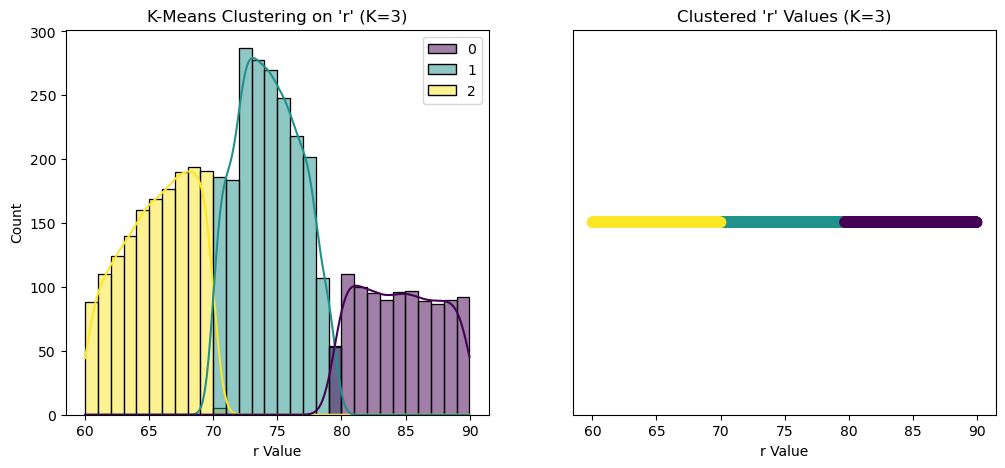

In [31]:


# Normalize the data (since it's only one feature, StandardScaler isn't critical, but keeping it for consistency)
scaler = StandardScaler()
comb_mot_scaled = scaler.fit_transform(comb_mot[['r']])  # Ensure it's a 2D array

### K-Means Clustering for k=1, 2, and 3 ###
silhouette_scores = {}

for k in [1, 2, 3]:  
    if k == 1:
        silhouette_scores[k] = None  # Silhouette score is undefined for k=1
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(comb_mot_scaled)
        silhouette_scores[k] = silhouette_score(comb_mot_scaled, kmeans_labels)

# Print silhouette scores
print("\nSilhouette Scores for K-Means:")
for k, score in silhouette_scores.items():
    if score is None:
        print(f"K = {k}: Silhouette score is undefined")
    else:
        print(f"K = {k}: {score:.3f}")

# Check which k has the highest silhouette score
optimal_k = max(silhouette_scores, key=lambda k: silhouette_scores[k] if silhouette_scores[k] is not None else -1)
print(f"\nOptimal K from Silhouette Score: {optimal_k}")

### DBSCAN Clustering ###
eps_values = [0.1, 0.5, 1.0, 1.5]  # Trying different eps values
best_dbscan_score = -1
best_dbscan_params = None

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(comb_mot_scaled)
    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

    if num_clusters > 1:  # Only calculate silhouette score for meaningful clusters
        sil_score = silhouette_score(comb_mot_scaled, dbscan_labels)
        if sil_score > best_dbscan_score:
            best_dbscan_score = sil_score
            best_dbscan_params = (eps, num_clusters)
        print(f"DBSCAN (eps={eps}): {num_clusters} clusters, Silhouette Score = {sil_score:.3f}")

if best_dbscan_params:
    print(f"\nBest DBSCAN: eps={best_dbscan_params[0]}, Clusters={best_dbscan_params[1]}, Silhouette Score={best_dbscan_score:.3f}")
else:
    print("\nDBSCAN failed to identify multiple clusters.")

# Visualizing K-Means Clustering for Optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(comb_mot_scaled)

plt.figure(figsize=(12, 5))

# Histogram of 'r' values colored by clusters
plt.subplot(1, 2, 1)
sns.histplot(x=comb_mot['r'], hue=kmeans_labels, bins=30, palette="viridis", kde=True)
plt.xlabel("r Value")
plt.ylabel("Count")
plt.title(f"K-Means Clustering on 'r' (K={optimal_k})")

# Scatter plot for 'r' clustering
plt.subplot(1, 2, 2)
plt.scatter(comb_mot['r'], np.zeros_like(comb_mot['r']), c=kmeans_labels, cmap="viridis", s=50)
plt.xlabel("r Value")
plt.title(f"Clustered 'r' Values (K={optimal_k})")
plt.yticks([])  # Remove y-axis since we only care about the clusters

plt.show()


In [36]:


# Add an identifier before shuffling
mot_a['Motor_Label'] = 0  # Motor A
mot_b['Motor_Label'] = 1  # Motor B

# Combine and shuffle
comb_mot = pd.concat([mot_a, mot_b], ignore_index=True)
comb_mot = comb_mot.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

# Store the true labels separately
true_labels = comb_mot['Motor_Label'].values  

# Select only the 'r' column for clustering
r_scaled = StandardScaler().fit_transform(comb_mot[['r']])
comb_mot.drop(columns=['Motor_Label'], inplace=True)
# Apply K-Means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(r_scaled)


# Align clusters with actual motors using crosstab
mapping = {}
crosstab = pd.crosstab(pd.Series(true_labels, name='True'), pd.Series(cluster_labels, name='Cluster'))
for k in range(2):
    true_label = np.argmax(crosstab.iloc[:, k])
    mapping[k] = true_label

# Apply mapping to predicted clusters
predicted_labels = np.array([mapping[label] for label in cluster_labels])

# Compute classification accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"K-Means Motor Classification Accuracy (based on 'r'): {accuracy:.3f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", cm)



K-Means Motor Classification Accuracy (based on 'r'): 0.849
Confusion Matrix:
 [[2384  381]
 [ 309 1507]]


In [37]:

# Assuming you have mot_a, mot_b dataframes
mot_a['Label'] = 0  # Assign label 0 for Motor A
mot_b['Label'] = 1  # Assign label 1 for Motor B

# Combine and shuffle data
combined_data = pd.concat([mot_a, mot_b]).sample(frac=1, random_state=42).reset_index(drop=True)

# Extract feature ('r') and true labels
X = combined_data[['r']].values  # Using only 'r' for clustering
true_labels = combined_data['Label'].values

# Apply Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
predicted_labels = gmm.fit_predict(X)

# Map cluster labels to original motor labels
# Since cluster assignments can be flipped, find best mapping
if np.mean(predicted_labels == true_labels) < 0.5:
    predicted_labels = 1 - predicted_labels  # Flip labels if needed

# Compute accuracy and confusion matrix
accuracy = accuracy_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print(f"GMM Motor Classification Accuracy (based on 'r'): {accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)


GMM Motor Classification Accuracy (based on 'r'): 0.855
Confusion Matrix:
[[2492  273]
 [ 392 1424]]


# Clustering Based on dalpha and gamma

In [41]:


# Assign labels to Motor A and Motor B
mot_a['Label'] = 0  # Label for Motor A
mot_b['Label'] = 1  # Label for Motor B

# Combine and shuffle data
combined_data = pd.concat([mot_a, mot_b]).sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features ('dalpha' and 'gamma') and true labels
X = combined_data[['d_alpha', 'gamma']].values  # Using 'dalpha' and 'gamma' for clustering
true_labels = combined_data['Label'].values

### 📌 K-MEANS CLUSTERING
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Ensure cluster labels match original motor labels
if accuracy_score(true_labels, kmeans_labels) < 0.5:
    kmeans_labels = 1 - kmeans_labels  # Flip labels if needed

# Evaluate K-Means
kmeans_accuracy = accuracy_score(true_labels, kmeans_labels)
kmeans_conf_matrix = confusion_matrix(true_labels, kmeans_labels)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

print(f"K-Means Motor Classification Accuracy (based on 'dalpha' & 'gamma'): {kmeans_accuracy:.3f}")
print(f"Confusion Matrix (K-Means):\n{kmeans_conf_matrix}")
print(f"Silhouette Score (K-Means): {kmeans_silhouette:.3f}\n")

### 📌 GAUSSIAN MIXTURE MODEL (GMM) CLUSTERING
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Ensure cluster labels match original motor labels
if accuracy_score(true_labels, gmm_labels) < 0.5:
    gmm_labels = 1 - gmm_labels  # Flip labels if needed

# Evaluate GMM
gmm_accuracy = accuracy_score(true_labels, gmm_labels)
gmm_conf_matrix = confusion_matrix(true_labels, gmm_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)

print(f"GMM Motor Classification Accuracy (based on 'dalpha' & 'gamma'): {gmm_accuracy:.3f}")
print(f"Confusion Matrix (GMM):\n{gmm_conf_matrix}")
print(f"Silhouette Score (GMM): {gmm_silhouette:.3f}")


K-Means Motor Classification Accuracy (based on 'dalpha' & 'gamma'): 0.647
Confusion Matrix (K-Means):
[[1825  940]
 [ 676 1140]]
Silhouette Score (K-Means): 0.587

GMM Motor Classification Accuracy (based on 'dalpha' & 'gamma'): 0.598
Confusion Matrix (GMM):
[[1659 1106]
 [ 735 1081]]
Silhouette Score (GMM): 0.559


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score

# Use only 'dalpha' and 'gamma' for clustering
features = combined_data[['d_alpha', 'gamma']]
labels_true = combined_data['Label']  # Assuming true labels exist

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## ================= DBSCAN ================= ##
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune eps & min_samples as needed
dbscan_labels = dbscan.fit_predict(features_scaled)

# Filter out noise points (-1 cluster)
filtered_idx = dbscan_labels != -1
filtered_labels = dbscan_labels[filtered_idx]
filtered_true_labels = labels_true.values[filtered_idx]

# Compute Accuracy (matching clusters to actual labels)
if len(set(filtered_labels)) > 1:
    dbscan_acc = max(
        accuracy_score(filtered_true_labels, filtered_labels),
        accuracy_score(filtered_true_labels, 1 - filtered_labels)
    )
    print(f"DBSCAN Classification Accuracy: {dbscan_acc:.3f}")
else:
    print("DBSCAN detected only one cluster (or too much noise).")

## ================= Spectral Clustering ================= ##
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(features_scaled)

# Compute Accuracy (matching clusters to actual labels)
spectral_acc = max(
    accuracy_score(labels_true, spectral_labels),
    accuracy_score(labels_true, 1 - spectral_labels)
)

print(f"Spectral Clustering Classification Accuracy: {spectral_acc:.3f}")

# Compute Silhouette Scores
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_scaled[filtered_idx], filtered_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

spectral_silhouette = silhouette_score(features_scaled, spectral_labels)
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.3f}")

# Confusion Matrix for Spectral Clustering
print("Confusion Matrix for Spectral Clustering:")
print(confusion_matrix(labels_true, spectral_labels))


DBSCAN detected only one cluster (or too much noise).
Spectral Clustering Classification Accuracy: 0.769
Spectral Clustering Silhouette Score: 0.347
Confusion Matrix for Spectral Clustering:
[[ 892 1873]
 [1652  164]]


In [54]:
comb_mot=combined_data

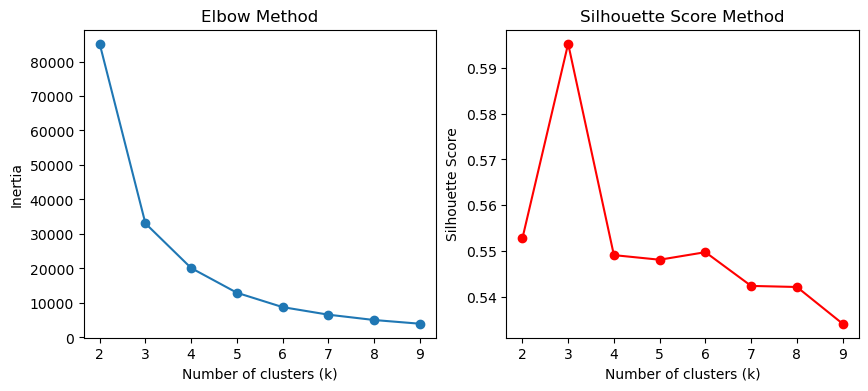

Optimal k: 3
Clustering Accuracy using 'r': 0.8219
Confusion Matrix:
[[2765    0]
 [ 816 1000]]


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from scipy.spatial.distance import cdist

# Load the dataset (assuming 'comb_mot' contains 'r' and 'Label')
# comb_mot = pd.read_csv("your_data.csv")  # Uncomment if loading from a file

# Extract 'r' and Label
X = comb_mot[['r']].values  # Use only 'r' for clustering
true_labels = comb_mot['Label'].values  # Actual labels (0 or 1)

# Find optimal k using Elbow & Silhouette Method
inertia = []
sil_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot Elbow & Silhouette Score
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='red')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

# Select optimal k (highest Silhouette Score)
optimal_k = k_range[np.argmax(sil_scores)]
print(f"Optimal k: {optimal_k}")

# Run K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
predicted_clusters = kmeans.fit_predict(X)

# Map clusters to actual labels based on majority voting
mapping = {}
for cluster in range(optimal_k):
    true_vals = true_labels[predicted_clusters == cluster]
    if len(true_vals) > 0:
        mapping[cluster] = int(pd.Series(true_vals).mode()[0])  # Majority voting
    else:
        mapping[cluster] = 0  # Default to 0 if cluster is empty

# Convert cluster predictions to 0/1 labels
final_predictions = np.array([mapping[c] for c in predicted_clusters])

# Ensure predictions are either 0 or 1
unique_pred_labels = list(mapping.values())
if len(unique_pred_labels) > 2:
    # If more than 2 unique labels, reassign the extra cluster based on distance to 0 or 1
    centers = kmeans.cluster_centers_.flatten()
    zero_center, one_center = centers[unique_pred_labels.index(0)], centers[unique_pred_labels.index(1)]
    for i, c in enumerate(predicted_clusters):
        if mapping[c] not in [0, 1]:
            # Assign to closest cluster (0 or 1)
            if abs(X[i] - zero_center) < abs(X[i] - one_center):
                final_predictions[i] = 0
            else:
                final_predictions[i] = 1

# Evaluate
accuracy = np.mean(final_predictions == true_labels)
conf_matrix = confusion_matrix(true_labels, final_predictions)

print(f"Clustering Accuracy using 'r': {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)